<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">Exercise 2
:</span> Data Cleaning</h1>
<hr>
Welcome to the workbook for <span style="color:royalblue">Exercise 2: Data Cleaning</span>! 

Remember, **better data beats better algorithms**.


<br><hr id="toc">

### In this lesson...

In this lesson, we'll cover the essential steps for building your analytical base table:
1. [Drop unwanted observations](#drop)
2. [Fix structural errors](#structural)
3. [Handle missing data](#missing-data)

Finally, we'll save the data to a new file so we can use it in other lessons.

<br><hr>

### First, let's import libraries and load the dataset.

In general, it's good practice to keep all of your library imports at the top of your notebook or program.

We've provided comments for guidance.

In [2]:
# NumPy for numerical computing
import numpy as np
# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)
# Matplotlib for visualization
import matplotlib.pyplot as plt
# Seaborn for easier visualization
import seaborn as sns
sns.set()

**Next, let's import the dataset.**

In [3]:
# Load employee data from CSV
df = pd.read_csv('../../data/employee_data.csv')

<br>

### **Now we're ready to jump into cleaning the data!**
### ...

<br>

In [4]:
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 10 columns):
avg_monthly_hrs      14249 non-null int64
department           13540 non-null object
filed_complaint      2058 non-null float64
last_evaluation      12717 non-null float64
n_projects           14249 non-null int64
recently_promoted    300 non-null float64
salary               14249 non-null object
satisfaction         14068 non-null float64
status               14249 non-null object
tenure               14068 non-null float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.1+ MB


In [9]:
df.shape

(14249, 10)

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
avg_monthly_hrs,14249.0,199.795775,50.998714,49.000000,155.000000,199.000000,245.000000,310.0
filed_complaint,2058.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0
last_evaluation,12717.0,0.718477,0.173062,0.316175,0.563866,0.724939,0.871358,1.0
n_projects,14249.0,3.773809,1.253126,1.000000,3.000000,4.000000,5.000000,7.0
recently_promoted,300.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0
satisfaction,14068.0,0.621295,0.250469,0.040058,0.450390,0.652527,0.824951,1.0
tenure,14068.0,3.497228,1.460917,2.000000,3.000000,3.000000,4.000000,10.0


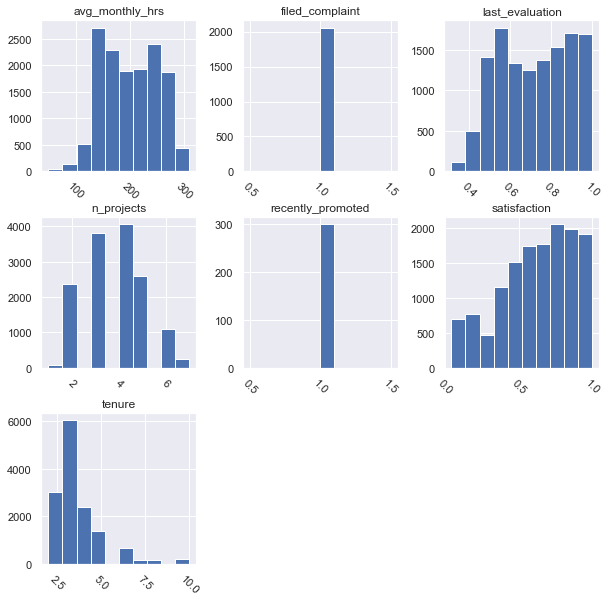

In [15]:
df.hist( xrot=-45, figsize=(10,10))
plt.show()

In [18]:
cat_df = df.select_dtypes(include='object') 
cat_df.head()

,department,salary,status
0,engineering,low,Left
1,support,low,Employed
2,sales,medium,Employed
3,sales,low,Employed
4,sales,low,Employed


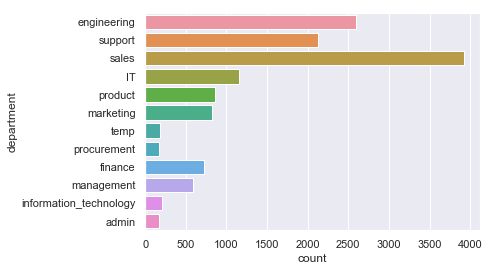

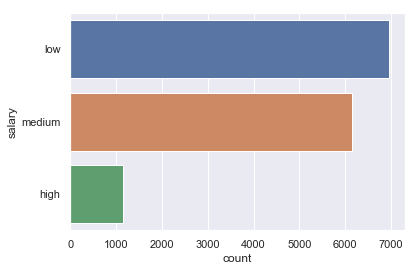

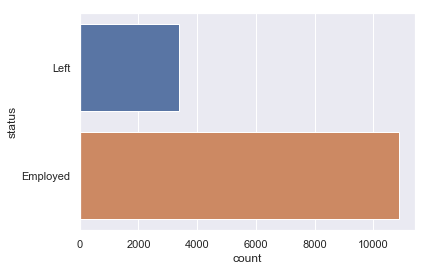

In [19]:
for object_series in cat_df: 
    sns.countplot(y=object_series, data=cat_df)
    plt.show()

<span id="drop"></span>
# 1. Drop Unwanted observations

The first step to data cleaning is removing samples from your dataset that you don't want to include in the model.

<br>

**First, <span style="color:royalblue">drop duplicates</span> from the dataset.**
* Then, print the shape of the new dataframe.

In [36]:
# Drop duplicates
df.shape

(14249, 10)

In [37]:
df.drop_duplicates(inplace=True)

In [39]:
df.shape

(14221, 10)

<br>

**Display all of the unique classes of the <code style="color:steelblue">'department'</code> feature**

In [25]:
df['department'].value_counts()

sales                     3923
engineering               2592
support                   2122
IT                        1161
product                    860
marketing                  819
finance                    728
management                 595
information_technology     209
temp                       181
admin                      176
procurement                174
Name: department, dtype: int64

In [33]:
not_temp = df['department'] != 'temp'
df[not_temp]['department'].value_counts()

sales                     3923
engineering               2592
support                   2122
IT                        1161
product                    860
marketing                  819
finance                    728
management                 595
information_technology     209
admin                      176
procurement                174
Name: department, dtype: int64

In [22]:
# Unique classes of 'department'
df[df['department'] != 'temp']['department'].value_counts()

sales                     3923
engineering               2592
support                   2122
IT                        1161
product                    860
marketing                  819
finance                    728
management                 595
information_technology     209
admin                      176
procurement                174
Name: department, dtype: int64

<br>

**Drop all observations that belong to the <span style="color:crimson">'temp'</span> department.**
* **Hint:** This is the same as keeping all that don't belong to that department.
* **Hint:** Remember to overwrite your original dataframe.
* Then, print the shape of the new dataframe.

In [4]:
# Drop temporary workers


<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>

<span id="structural"></span>
# 2. Fix structural errors

The next bucket under data cleaning involves fixing structural errors, which arise during measurement, data transfer, or other types of "poor housekeeping."

<br>

**Print the unique values of <code style="color:steelblue">'filed_complaint'</code> and <code style="color:steelblue">'recently_promoted'</code>.**

In [87]:
# Print unique values of 'filed_complaint'
df['filed_complaint'].value_counts(dropna=False)

NaN    12165
1.0     2056
Name: filed_complaint, dtype: int64

In [88]:
# Print unique values of 'recently_promoted'
df['recently_promoted'].value_counts(dropna=False)

NaN    13921
1.0      300
Name: recently_promoted, dtype: int64

<br>

**Fill missing <code style="color:steelblue">'filed_complaint'</code> and <code style="color:steelblue">'recently_promoted'</code> values with <code style="color:crimson">0</code>.**

In [245]:
df['filed_complaint'].value_counts(dropna=False)

NaN    12165
1.0     2056
Name: filed_complaint, dtype: int64

In [247]:
# NaN values in filed_complaint should be 0.
df['filed_complaint'].fillna(0).value_counts(dropna=False)

0.0    12165
1.0     2056
Name: filed_complaint, dtype: int64

In [243]:
nan_complaint.sum()

2056

In [248]:
df['recently_promoted'].value_counts(dropna=False)

NaN    13921
1.0      300
Name: recently_promoted, dtype: int64

In [249]:

df['recently_promoted'].fillna(0).value_counts(dropna=False)

0.0    13921
1.0      300
Name: recently_promoted, dtype: int64

In [220]:
# NaN values in recently_promoted should be 0.

df_promoted = df[df['recently_promoted'] == 1.0]['recently_promoted'].replace(False, 0)

<br>

**Print the unique values of <code style="color:steelblue">'filed_complaint'</code> and <code style="color:steelblue">'recently_promoted'</code> again, just to confirm.**

In [221]:
# Print unique values of 'filed_complaint'
df_promoted.value_counts(dropna=False)

1.0    300
Name: recently_promoted, dtype: int64

In [200]:
# Print unique values of 'recently_promoted'
df_promoted.sum()

300.0

<br>

**Replace any instances of <code style="color:crimson">'information_technology'</code> with <code style="color:crimson">'IT'</code> instead.**
* Remember to do it **inplace**, OR better yet, save over the column.
* Then, plot the **bar chart** for <code style="color:steelblue">'department'</code> to see its new distribution.

In [112]:
df['department'].value_counts()

sales                     3923
engineering               2592
support                   2122
IT                        1161
product                    860
marketing                  819
finance                    728
management                 595
information_technology     209
admin                      176
procurement                174
temp                       153
Name: department, dtype: int64

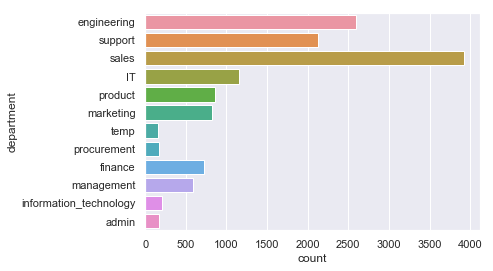

In [111]:
sns.countplot( y='department' , data=df)
plt.show()

In [110]:
# 'information_technology' should be 'IT'
df['department'].replace('information_technology', 'IT').value_counts()


sales          3923
engineering    2592
support        2122
IT             1370
product         860
marketing       819
finance         728
management      595
admin           176
procurement     174
temp            153
Name: department, dtype: int64

In [116]:
df['deparment'] = df['department'].replace('information_technology', 'IT')
df['deparment'].value_counts()

sales          3923
engineering    2592
support        2122
IT             1370
product         860
marketing       819
finance         728
management      595
admin           176
procurement     174
temp            153
Name: deparment, dtype: int64

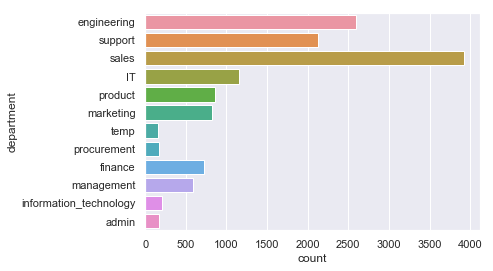

In [121]:
# Plot class distributions for 'department'

sns.countplot(y='department' , data=df)
plt.show()

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>

<span id="missing-data"></span>
# 3. Handle missing data

Next, it's time to handle **missing data**. 

<br>

**Display the <span style="color:royalblue">number of missing values</span> for each feature (both categorical and numeric).**

In [139]:
# Display number of missing values for all features in the dataset.
df.select_dtypes(include="object").isnull().sum()

department    709
salary          0
status          0
deparment     709
dtype: int64

<br>

**Label missing values in <code style="color:steelblue">'department'</code> as <code style="color:crimson">'Missing'</code>.**
* By the way, the <code style="color:steelblue">.fillna()</code> function also has an <code style="color:steelblue">inplace=</code> argument, just like the <code style="color:steelblue">.replace()</code> function.
* Normally, I recommend we overwrote that column. This time, try using the <code style="color:steelblue">inplace=True</code> argument instead, which does not RETURN anything. Therefore no need to overwrite nay variable. 

In [149]:
# Fill missing values in department with 'Missing'

df['department'].fillna("Missing", inplace=True)
df['department'].value_counts(dropna=False)

sales                     3923
engineering               2592
support                   2122
IT                        1161
product                    860
marketing                  819
finance                    728
Missing                    709
management                 595
information_technology     209
admin                      176
procurement                174
temp                       153
Name: department, dtype: int64

<br>

**First, let's flag <code style="color:steelblue">'last_evaluation'</code> with an indicator variable of missingness.** 
* <code style="color:crimson">0</code> if not missing.
* <code style="color:crimson">1</code> if missing. 

Let's name the new indicator variable <code style="color:steelblue">'last_evaluation_missing'</code>.
* We can use the <code style="color:steelblue">.isnull()</code> function.
* Also, remember to convert it with <code style="color:steelblue">.astype(int)</code>

In [155]:
# Indicator variable for missing last_evaluation
df['last_evaluation_missing'] = df['last_evaluation'].isnull().astype(int)
df.columns

Index(['avg_monthly_hrs', 'department', 'filed_complaint', 'last_evaluation',
       'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'status',
       'tenure', 'deparment', 'last_evaluation_missing'],
      dtype='object')

<br>

**Then, simply fill in the original missing value with <code style="color:crimson">0</code> just so your algorithms can run properly.**\

<br>
<b style="color:crimson">WARNING!</b> This is <b style="color:crimson">NOT</b> standard practice!!! 

In [238]:
# .replace(True, 0)
df['last_evaluation'].fillna(0)

0        0.932868
1        0.000000
2        0.788830
3        0.575688
4        0.845217
5        0.589097
6        0.625399
7        0.644586
8        0.524114
9        0.909364
10       0.000000
11       0.925480
12       0.946724
13       0.770248
14       0.579966
15       0.837503
16       0.452832
17       0.919196
18       0.570039
19       0.000000
20       0.763607
21       0.000000
22       0.000000
23       0.937509
24       0.000000
25       0.798069
26       0.716030
27       0.550434
28       0.000000
29       0.762948
           ...   
14219    0.901998
14220    0.000000
14221    0.756817
14222    0.861479
14223    0.853785
14224    0.912136
14225    0.630601
14226    0.674010
14227    0.739307
14228    0.621068
14229    0.641048
14230    0.770993
14231    0.921121
14232    0.629577
14233    0.518086
14234    0.534559
14235    0.000000
14236    0.985610
14237    0.641214
14238    0.899024
14239    0.781112
14240    0.531197
14241    0.683498
14242    0.707167
14243    0

In [239]:
# Fill missing values in last_evaluation with 0

<br>

**Display the number of missing values for each feature (both categorical and numeric) again, just to confirm.**

In [250]:
# Display number of missing values by feature
# df.isnull.sum()
df.isnull().sum()

avg_monthly_hrs                0
department                     0
filed_complaint            12165
last_evaluation             1504
n_projects                     0
recently_promoted          13921
salary                         0
satisfaction                 153
status                         0
tenure                       153
deparment                    709
last_evaluation_missing        0
dtype: int64

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>

<span id="save-abt"></span>
# 5. Save the data

Finally, let's save the **cleaned data**. 

<br>

In [ ]:
 # Save the dataframe to csv


<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>

<br>

## Next Steps

Congratulations for making through Exercise 2's Employee data cleaning!

As a reminder, here are a few things you did in this module:
* You cleaned dropped irrelevant observations from the dataset.
* You fixed various structural errors, such as wannabe indicator variables.
* You handled missing data.

<p style="text-align:center; margin: 40px 0 40px 0; font-weight:bold">
<a href="#toc">Back to Contents</a>
</p>